# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [182]:
print("Для воспроизводимости экспериментов")

Для воспроизводимости экспериментов


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [183]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [184]:
# your code here
df_train.loc[np.random.randint(0, len(df_train), size=10), ]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
860,Renault KWID RXT,2016,330000,20000,Petrol,Individual,Manual,First Owner,25.17 kmpl,799 CC,53.3 bhp,72Nm@ 4386rpm,5.0
5390,Maruti Ertiga ZDI Plus,2017,825000,79000,Diesel,Dealer,Manual,First Owner,25.47 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,7.0
5226,Hyundai Xcent 1.2 VTVT SX,2020,524000,32000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
5191,Mahindra XUV500 W10 2WD,2015,850000,140000,Diesel,Individual,Manual,First Owner,16.0 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.0
3772,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
3092,Toyota Innova 2.5 VX 7 STR,2010,515000,200000,Diesel,Individual,Manual,First Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),7.0
5734,Skoda Rapid 1.6 TDI Ambition Plus Alloy,2012,380000,145000,Diesel,Individual,Manual,First Owner,20.5 kmpl,1598 CC,103.5 bhp,250Nm@ 1500-2500rpm,5.0
6265,Toyota Innova 2.5 Z Diesel 7 Seater BS IV,2014,950000,80000,Diesel,Dealer,Manual,First Owner,12.99 kmpl,2494 CC,100.6 bhp,200Nm@ 1200-3600rpm,7.0
466,Honda City i VTEC VX,2015,900000,22000,Petrol,Individual,Manual,First Owner,17.4 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
5334,Maruti Vitara Brezza ZDi,2019,890000,9000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [185]:
# your code here
df_test.head(n=5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [186]:
df_test.tail(n=5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [187]:
# your code here
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [188]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [189]:
# your code here
print(f'missing values in train:\n{df_train.isna().sum()}\n')

missing values in train:
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64



In [190]:
print(f'missing values in test:\n{df_test.isna().sum()}')

missing values in test:
name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64


>__Ответ__:  Пропущенные значения имеются в стобцах `mileage`, `engine`, `max_power`, `torque`, `seats` в трейне и в тесте

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [191]:
# your code here
columns_to_check = df_train.columns[df_train.columns != 'selling_price']

duplicated_elems = df_train[df_train.duplicated(subset=columns_to_check, keep='first')]

print('number of duplicated elems:' 
      f'{len(duplicated_elems)}')

number of duplicated elems:1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [192]:
# your code here
duplicated_elems.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [193]:
# your code here
df_train.drop_duplicates(inplace=True, subset=columns_to_check, keep='first')
len(df_train)

5840

In [194]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [195]:
# your code here
df_train.reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [196]:
# your code here

# define preprocessing functions
import re

def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    df['mileage'] = pd.to_numeric(df['mileage'].map(lambda obj: re.sub('[^0-9.]', '', obj), na_action='ignore'),
                                  errors='coerce')
                                
    df['engine'] = pd.to_numeric(df['engine'].map(lambda obj: re.sub('[^0-9.]', '', obj), na_action='ignore'),
                                  errors='coerce')
    df['max_power'] = pd.to_numeric(df['max_power'].map(lambda obj: re.sub('[^0-9.]', '', obj), na_action='ignore'),
                                  errors='coerce')
    df = df.drop(columns=['torque'])
    return df

In [197]:
df_train = preprocess_data(df_train)
df_test = preprocess_data(df_test)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [198]:
# your code here
train_median = df_train.median(numeric_only=True)
df_train.fillna(train_median, inplace=True)
df_test.fillna(train_median, inplace=True)

df_train.isna().sum()



name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [199]:
print("Это целесообразно, потому что количество мест в машин чаще все ограничивается тремя категориями:\n"
      "2х местные автомобили\n"
      "5х местные автомобили\n"
      "автомобили, в которых количество мест больше 5")


Это целесообразно, потому что количество мест в машин чаще все ограничивается тремя категориями:
2х местные автомобили
5х местные автомобили
автомобили, в которых количество мест больше 5


In [200]:
# your code here

df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)


df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

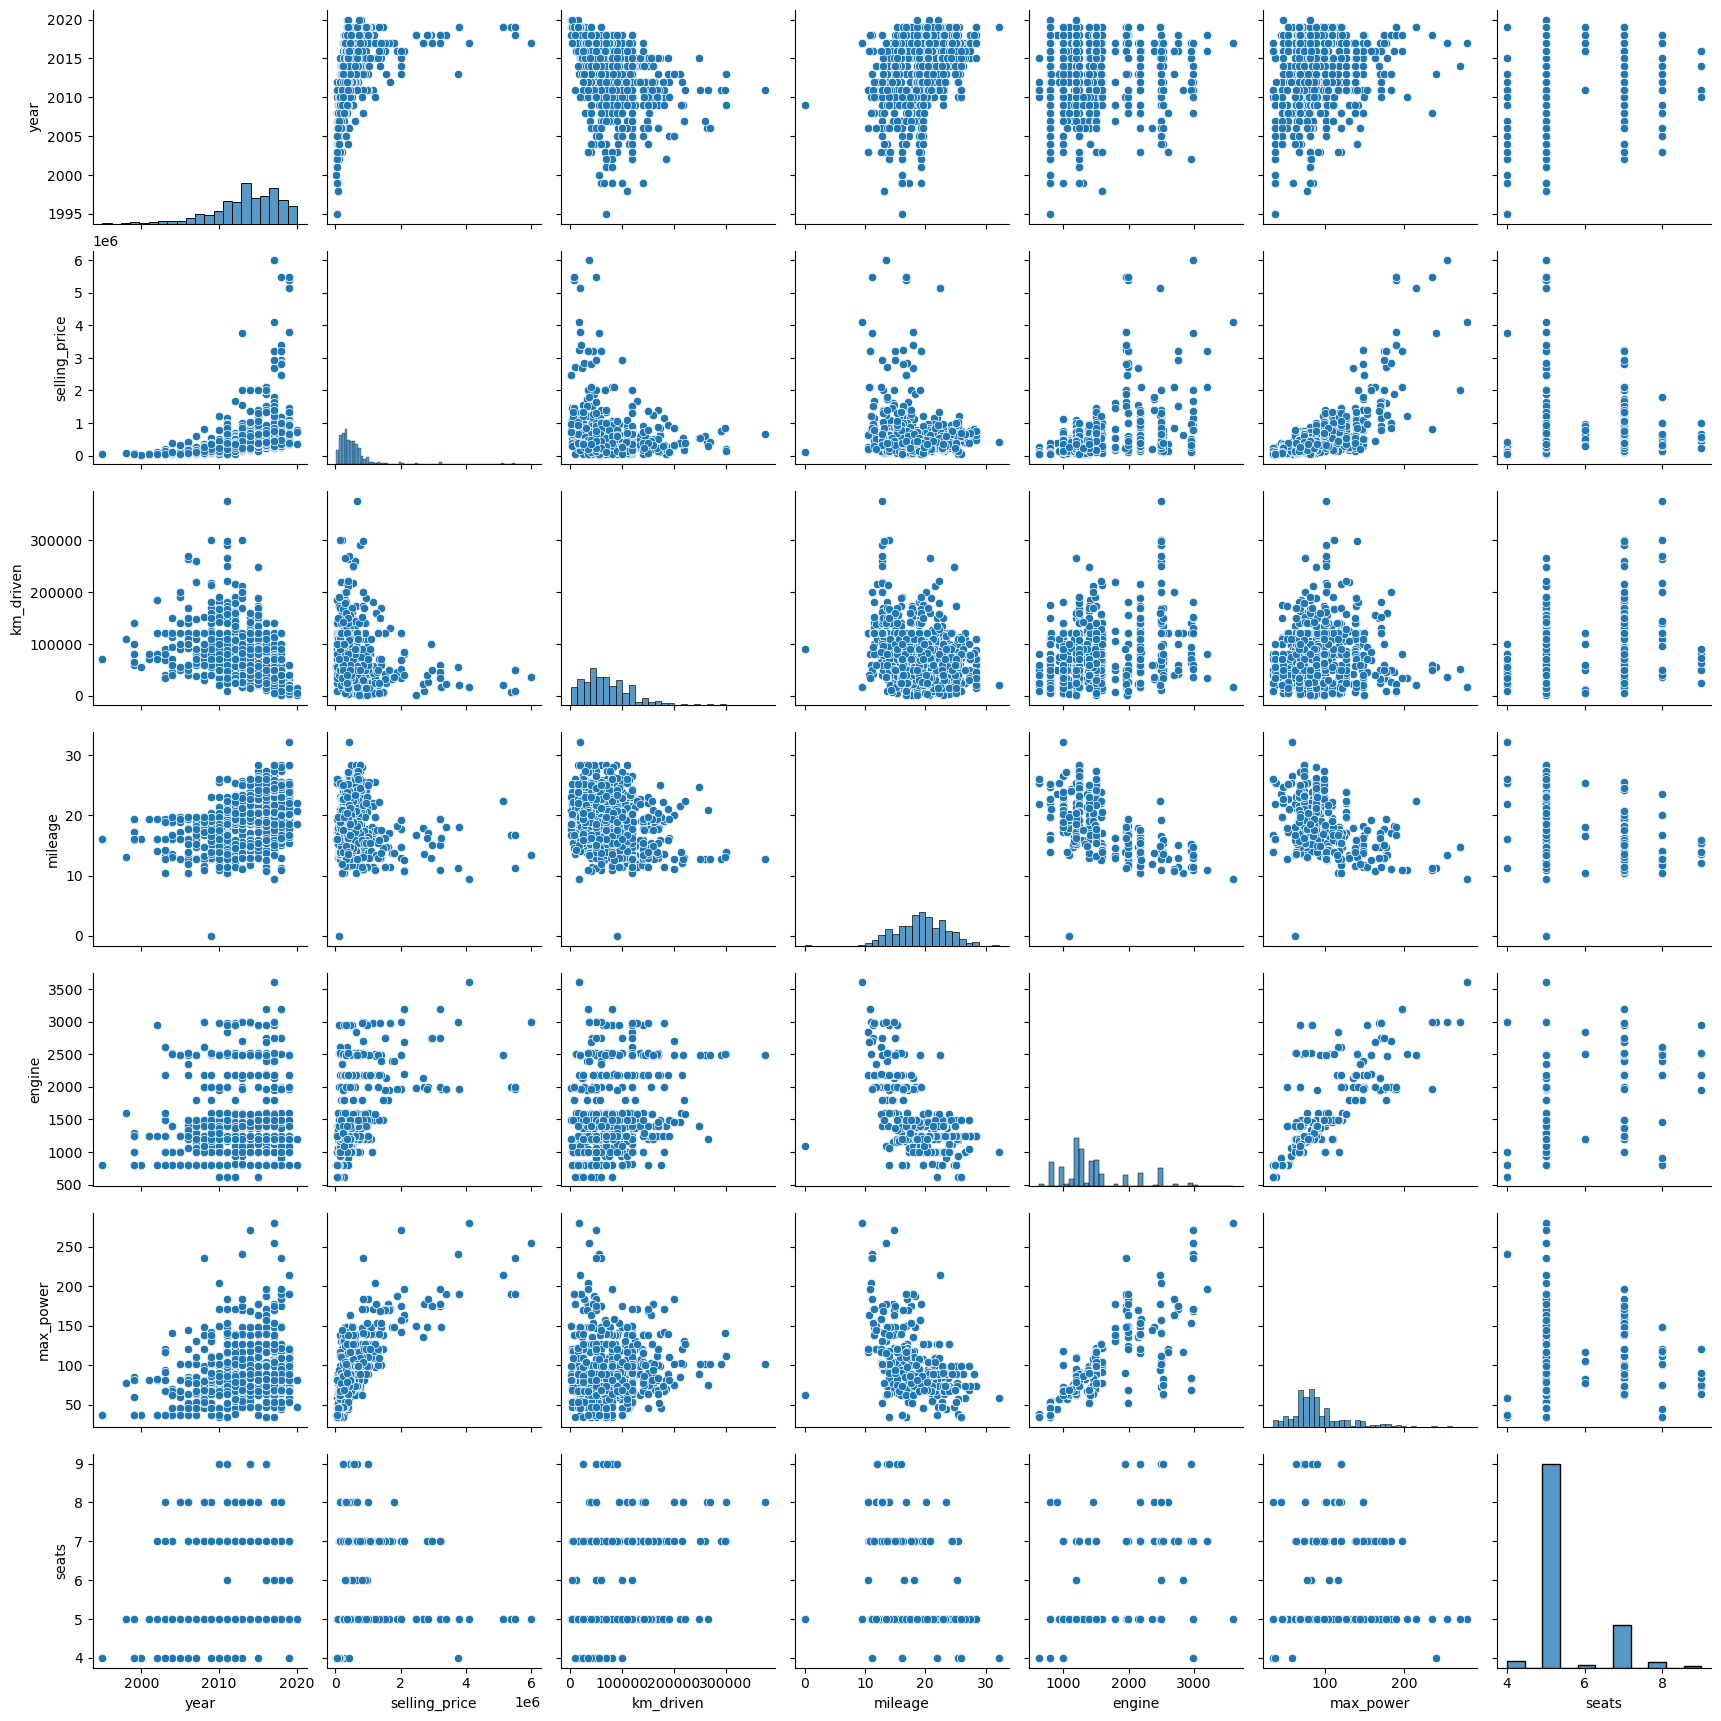

In [201]:
# your code here
sns.pairplot(df_test.select_dtypes(include='number'))

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?</font>
>__Ответ__: Между некоторыми предикторами  и целевой переменной наблюдается зависимость. Например, можно увидеть зависимость `selling_price` от `year`. Чем моложе авто, тем больше его цена. Также, можно заметить, что некоторые признаки не обладают ярко выраженной зависимостью. Можно обратить внимание на `selling_price` и `mileage`. Основываясь на графике, складывается впечатление, что пробег автомобиля не сильно влияет на цену автомобиля. Это довольно контр-интуитивно.
* <font color='#FF6600'> А о корреляциях признаков? </font>
>__Ответ__: Основываясь на графиках, можно заметить, `max_power` и `engine` обладают довольно сильной линейной зависимостью. Складывалось впечатление, что одно можно выразить через другое, но умные люди [объяснили](https://www.quora.com/How-many-CC-in-an-HP-1-BHP), что большой объем двигателя не обзательно свидетельствует о его высокой мощности. Но, нужно иметь в виду эти предикторы, так как они могут испортить качество модели. Также, можно сказать, что чем машина моложе, чем меньше километром она проехала, что довольно очевидно. Не удивительно, но современные машины стараются делать экономичнее, что можно заметить на графике `mileage` и `year`.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

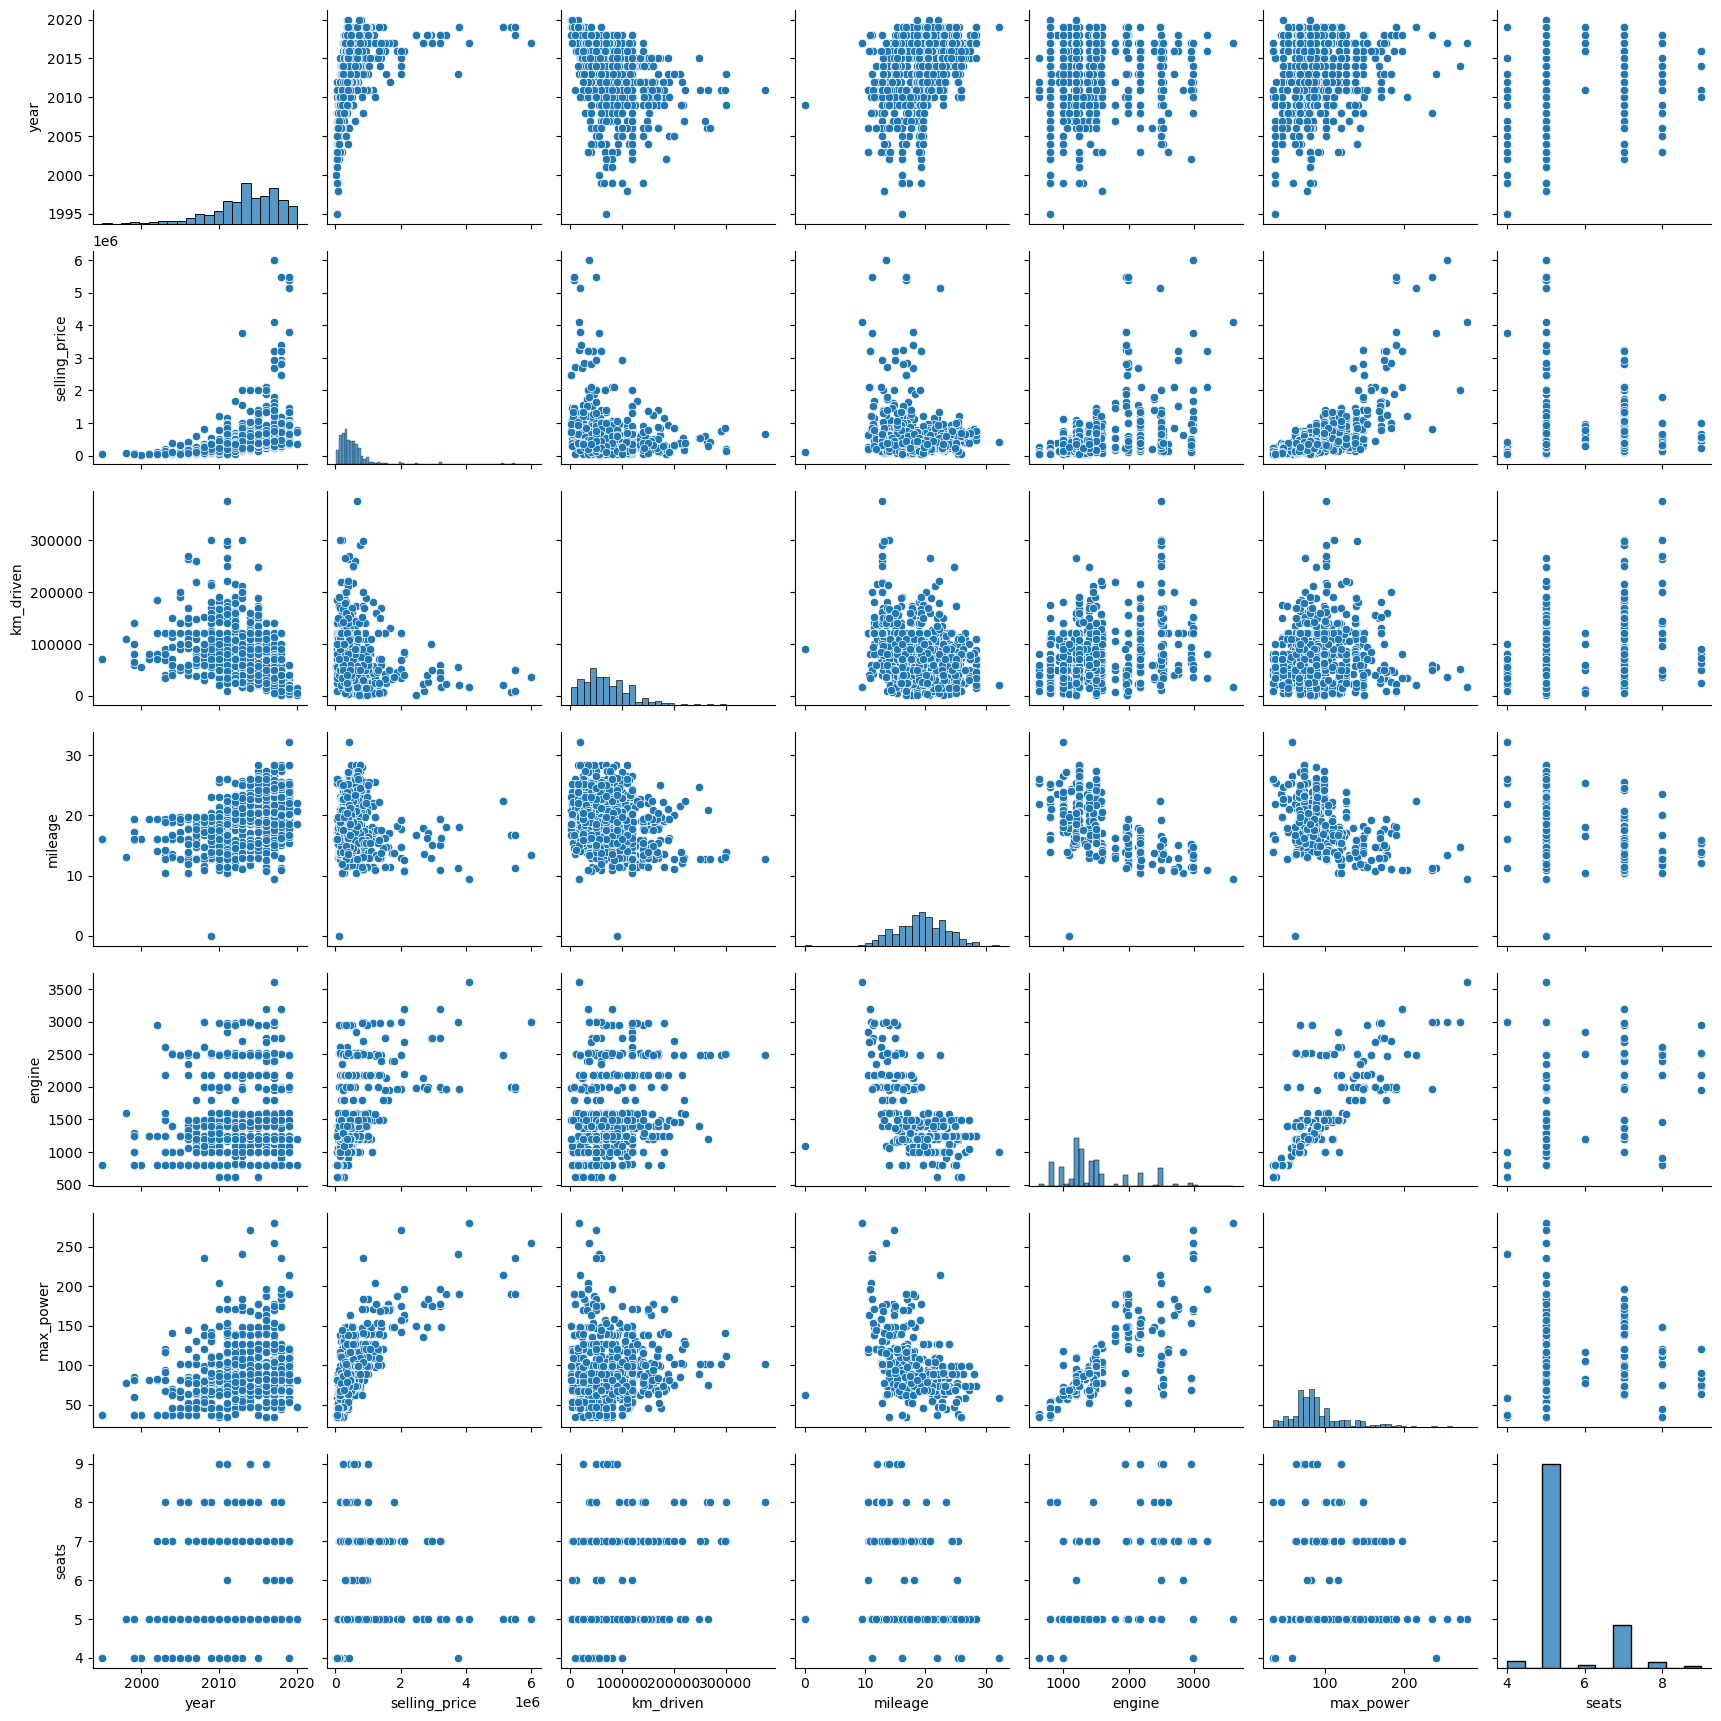

In [202]:
# your code here
sns.pairplot(df_test.select_dtypes(include='number'))

>__Ответ__: Да, в основном, распределения оказались похожими

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

[Text(0.5, 1.0, 'Pairwise correlation')]

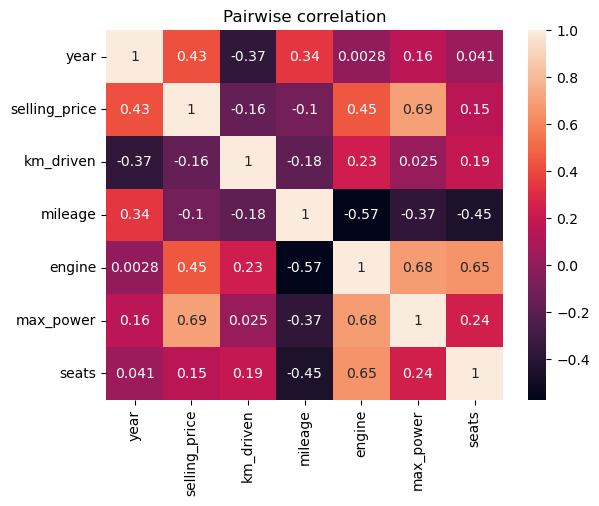

In [203]:
# your code here
sns.heatmap(df_train.select_dtypes(include='number').corr(), annot=True).set(title='Pairwise correlation')

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
>__Ответ:__ `year`, `engine`
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
>__Ответ:__ `engine`, `max_power`
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>
>__Ответ:__ Правильно

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<Axes: xlabel='max_power', ylabel='engine'>

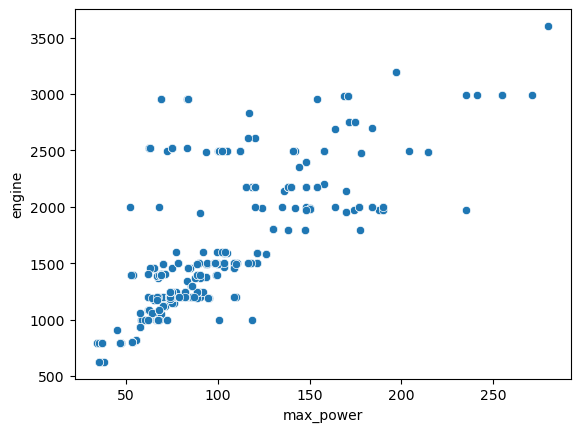

In [204]:
# your code here
sns.scatterplot(data=df_test, x='max_power', y='engine')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

>__Пояснение__: Можно попробовать визуализировать как влияют категориальные предикторы на целевую переменную и понадблюдать зависимости (если будут).

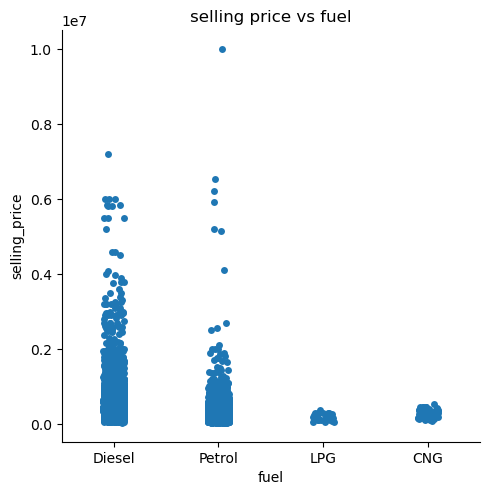

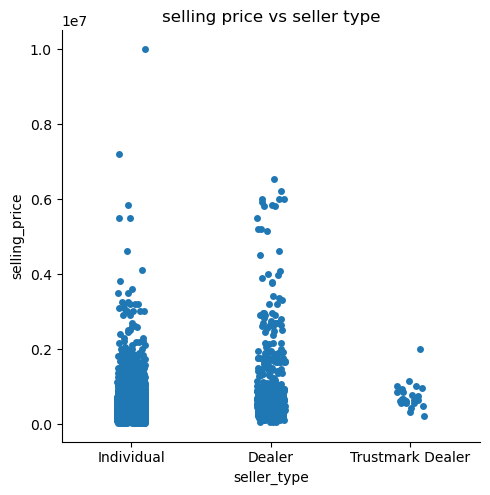

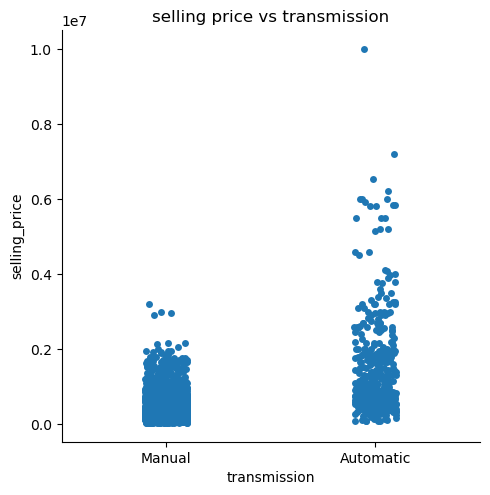

In [205]:
# your code here
sns.catplot(x='fuel', y='selling_price', data=df_train).set(title="selling price vs fuel")
sns.catplot(x='seller_type', y='selling_price', data=df_train).set(title="selling price vs seller type")
sns.catplot(x='transmission', y='selling_price', data=df_train).set(title='selling price vs transmission')



>__Наблюдения__: Можно заметить, что автомобили, которые заправляются газом (`LPG`, `CNG`) обладают потенциально ниже ценой, чем те, которые заправляются дизелем и бензином. <br>
Никаких явных выводов нельзя сделать по поводу зависимости цены от вида продавца, кроме того, что `Trustmark Dealer` довольно мало. <br>
Касаемо трансмиссии, то автомобили с автоматической коробкой передач потенцильно будут стоить дороже, что очевидно


# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [206]:
y_train = df_train.select_dtypes(include='number')['selling_price']
X_train = df_train.select_dtypes(include='number').drop(columns=['selling_price'])

In [207]:
assert X_train.shape == (5840, 6)

In [208]:
y_test = df_test.select_dtypes(include='number')['selling_price']
X_test = df_test.select_dtypes(include='number').drop(columns=['selling_price'])

In [209]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print(f'train MSE: {MSE(y_train, y_pred)} R2: {r2_score(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'test MSE: {MSE(y_test, y_pred)} R2: {r2_score(y_test, y_pred)}')


train MSE: 116874153930.0284 R2: 0.5922591702157322
test MSE: 233298779730.45557 R2: 0.5941419794788416


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [211]:
from sklearn.preprocessing import StandardScaler

# your code here

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print(f'train MSE: {MSE(y_train, y_pred)} R2: {r2_score(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'test MSE: {MSE(y_test, y_pred)} R2: {r2_score(y_test, y_pred)}')


train MSE: 116874153930.0289 R2: 0.5922591702157305
test MSE: 233298779730.44974 R2: 0.5941419794788518


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>
> __Ответ__: Коэффициент при `max_power` имеет самое большое значение, то есть, он содержит в себе больше всего информации для описания стоимости машины

/tmp/ipykernel_7542/638838157.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  .set(xticklabels=ticks,


[[Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'seats')],
 Text(0.5, 1.0, 'Linear regression coefficients')]

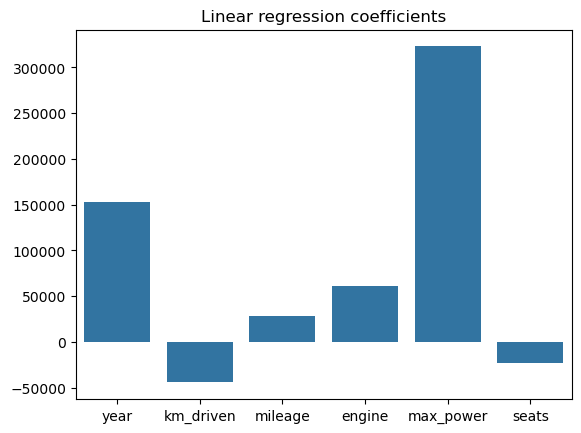

In [212]:
# your code here
ticks = df_train.select_dtypes(include='number').drop(columns=['selling_price']).columns
sns.barplot(model.coef_)\
    .set(xticklabels=ticks,
         title="Linear regression coefficients")

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [213]:
from sklearn.linear_model import Lasso

# your code here
model = Lasso()

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print(f'train MSE: {MSE(y_train, y_pred)} R2: {r2_score(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'test MSE: {MSE(y_test, y_pred)} R2: {r2_score(y_test, y_pred)}')

train MSE: 116874153940.1429 R2: 0.5922591701804456
test MSE: 233299450599.16925 R2: 0.5941408124026637


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>
>__Ответ__: Коэффициенты не занулились, потому что, вероятно, все предикторы необходимы для оценки стоимости автомобиля. Или, может быть, дефолтная `alpha` регуляризации не лучший выбор.

/tmp/ipykernel_7542/1078965141.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  .set(xticklabels=ticks,


[[Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'seats')],
 Text(0.5, 1.0, 'Linear regression coefficients')]

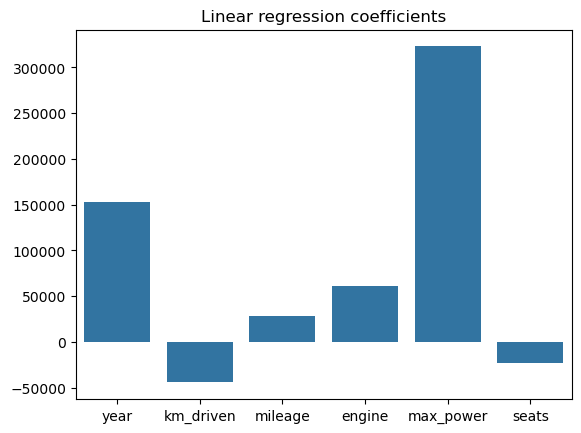

In [214]:
# your code here
sns.barplot(model.coef_)\
    .set(xticklabels=ticks,
         title="Linear regression coefficients")

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [215]:
from sklearn.model_selection import GridSearchCV

# your code here
model = GridSearchCV(estimator=Lasso(), cv=10, param_grid={'alpha': [0.005, 0.02, 0.03, 0.05, 0.06, 1., 2., 3., 10000, 20000, 30000]})

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print(f'train MSE: {MSE(y_train, y_pred)} R2: {r2_score(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'test MSE: {MSE(y_test, y_pred)} R2: {r2_score(y_test, y_pred)}')

print(f'Best estimator: {model.best_estimator_}, best param: {model.best_params_}')

train MSE: 120090418316.77303 R2: 0.5810385344655733
test MSE: 252484091103.67712 R2: 0.5607662691300177
Best estimator: Lasso(alpha=30000), best param: {'alpha': 30000}


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>
>__Ответ__: GridSearch-y пришлось обучать 11 моделей, так как поиск параметров происходил в одномерном простарнстве

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>
>__Ответ__: Коэффициент `alpha` у лучшей модели равен `30000`. Занулились веса при `mileage`, `engine` и `seats`

/tmp/ipykernel_7542/2101024658.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  .set(xticklabels=ticks,


[[Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'seats')],
 Text(0.5, 1.0, 'Linear regression coefficients')]

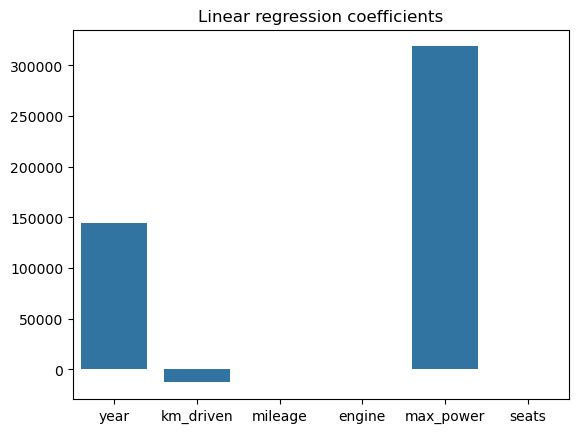

In [216]:
# your code here
sns.barplot(model.best_estimator_.coef_)\
    .set(xticklabels=ticks,
         title="Linear regression coefficients")

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [217]:
from sklearn.linear_model import ElasticNet

# your code here
model = GridSearchCV(estimator=ElasticNet(), cv=10, param_grid={'alpha': [0.005, 0.02, 0.03, 0.05, 0.06, 1., 2., 3., 10000, 20000, 30000]})

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print(f'train MSE: {MSE(y_train, y_pred)} R2: {r2_score(y_train, y_pred)}')

y_pred = model.predict(X_test)
print(f'test MSE: {MSE(y_test, y_pred)} R2: {r2_score(y_test, y_pred)}')

train MSE: 117001537401.09396 R2: 0.5918147653542076
test MSE: 237094902545.8879 R2: 0.5875380577039115


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [218]:
# your code here
model.best_params_

{'alpha': 0.06}

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [219]:
# your code here
X_train_cat = df_train.drop(columns=['selling_price', 'name'])

In [220]:
assert X_train_cat.shape == (5840, 10)

In [221]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [222]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

# for the train
X_train_cat['seats'] = X_train_cat['seats'].astype(object)

cat_columns = X_train_cat.select_dtypes(object).columns

categories = [X_train_cat[key].unique() for key in cat_columns]

encoder = OneHotEncoder(categories=categories, sparse_output=False)

encoder.fit(X_train_cat[cat_columns])

X_train_cat[encoder.get_feature_names_out()] = encoder.transform(X_train_cat[cat_columns])
X_train_cat.drop(inplace=True, columns=cat_columns)

# standardize

numeric_columns =  X_train_cat.select_dtypes(include='number').columns
scaler.fit(X_train_cat[numeric_columns])
X_train_cat[numeric_columns] = scaler.transform(X_train_cat[numeric_columns])

In [223]:
# for the test
X_test_cat = df_test.drop(columns=['selling_price', 'name'])
X_test_cat['seats'] = X_test_cat['seats'].astype(object)

encoder.fit(X_test_cat[cat_columns])

X_test_cat[encoder.get_feature_names_out()] = encoder.transform(X_test_cat[cat_columns])
X_test_cat.drop(inplace=True, columns=cat_columns)

## standardize

X_test_cat[numeric_columns] = scaler.transform(X_test_cat[numeric_columns])

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>
>__Ответ__: Да, удалось существенно улучшить качество предсказания модели

In [235]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

# your code here
model = GridSearchCV(estimator=Ridge(), cv=10, param_grid={'alpha': [0.005, 0.02, 0.03, 0.05, 0.06, 1., 2., 3., 10000, 20000, 30000]})

model.fit(X_train_cat, y_train)

y_pred = model.predict(X_train_cat)

#print(y_pred[270])
#print(y_train[270])
#print(X_train_cat.loc[860])
#print(X_train_cat.loc[270].values.reshape(1, -1).shape)
#print(model.best_estimator_.coef_.shape)
#print(model.best_estimator_.intercept_ + (X_train_cat.loc[270] @ model.best_estimator_.coef_))

print(f'train MSE: {MSE(y_train, y_pred)} R2: {r2_score(y_train, y_pred)}')

y_pred = model.predict(X_test_cat)
print(f'test MSE: {MSE(y_test, y_pred)} R2: {r2_score(y_test, y_pred)}')

print(f'Best estimator: {model.best_estimator_}, best param: {model.best_params_}')

train MSE: 95368590148.13155 R2: 0.6672859928839747
test MSE: 215071416692.03094 R2: 0.6258511958349777
Best estimator: Ridge(alpha=3.0), best param: {'alpha': 3.0}


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [233]:
# your code here



522960.0910958869

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [234]:
def business_metrics(y_true, y_pred):
    # your code here
    return (np.abs(y_true - y_pred) <= y_test * 0.1).sum() / len(y_true)

business_metrics(y_test, y_pred)

0.249

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [227]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

In [229]:
# we need to save OneHotEncoder configuration, StandardScaler and best model

import pickle

with open('prediction_model_coef.pkl', mode='wb') as model_file:
    model_params = {}
    model_params['coef'] = model.best_estimator_.coef_
    model_params['intercept'] = model.best_estimator_.intercept_
    pickle.dump(model_params, file=model_file)

with open('encoder.pkl', mode='wb') as ohe_file:
    pickle.dump(encoder, file=ohe_file)

with open('scaler.pkl', mode='wb') as scaler_file:
    pickle.dump(scaler, file=scaler_file)


Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link